In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## HW4 - Introduction
In this assignment you'll be using Python to do some data analysis.

In Problem 2, you'll be using pandas and matplotlib (and other tools) to do some data cleaning, prep and analysis. 
This problem is based on things we learned in the [Data wrangling with Python module](http://www.sba.oakland.edu/faculty/isken/courses/mis5470_f23/data_wrangling_python.html) and the [Data analysis and plotting in Python module](http://www.sba.oakland.edu/faculty/isken/courses/mis5470_f23/eda_python.html). Of course, it's also based on the Python fundamentals we learned in the first two Python modules. In particular, the following two Jupyter notebooks will be **extremely** helpful. You should **not** attempt this problem until you have thoroughly reviewed those notebooks and the accompanying screencasts.

* **data_cleaning_regex.ipynb** - regex
* **ORSchedLeadTime.ipynb** - pandas and matplotlib


The data is from eBird. [eBird.org](http://ebird.org/content/ebird/) is an extremely popular online site for entering bird sightings. It was started by the [Cornell Lab of Ornithology](http://www.birds.cornell.edu) and the [National Audobon Society](https://www.audubon.org/). I chose this dataset for a few reasons. First of all, eBird is a great success story in the *citizen science* movement and shows the power of crowd sourced data collection. I also want to highlight how such *hobby* data can be a great source of data as you start to learn how to do analytics with tools like Python and R. By finding a dataset that interests you, it's easy to get motivated to learn the analysis skills needed to clean, prep and analyze your dataset. Maybe you're interested in Pokemon, or a specific genre of music/film, or some online game, or selling things on Etsy - there is data to be had. Another benefit of working with a dataset that really interests you is that it can be relatively easy to create a tutorial or blog post that can be a great addition to your online portfolio and that you can share with potential employers. Furthermore, it's not that hard to create something that actually draws quite a few readers. For example, if you Google "ebird python r", one of [my blog posts](https://bitsofanalytics.org/posts/otbirders-1-ebirdapi-python/otbirders_1_ebirdapi_python_1) is still on the first page of results. Take a look at this post for some background info on how I obtained this data and the nature of the data.

One final reason I wanted to use this dataset is that the [popularity of birding has absolutely exploded during the pandemic](https://www.nytimes.com/2020/05/29/science/bird-watching-coronavirus.html).

### Analyzing eBird data

[eBird.org](http://ebird.org/content/ebird/) is an extremely popular online site for entering bird sightings. It was started by the [Cornell Lab of Ornithology](http://www.birds.cornell.edu) and the [National Audobon Society](https://www.audubon.org/).

> A real-time, online checklist program, eBird has revolutionized the way that the birding
> community reports and accesses information about birds. Launched in 2002 by the Cornell 
> Lab of Ornithology and National Audubon Society, eBird provides rich data sources for
> basic information on bird abundance and distribution at a variety of spatial and temporal
> scales.

> The observations of each participant join those of others in an international network of eBird users.
> eBird then shares these observations with a global community of educators, 
> land managers, ornithologists, and conservation biologists. In time these data will
> become the foundation for a better understanding of bird distribution across the western
> hemisphere and beyond.

Not only does eBird make it easy for you to enter sightings and manage your own lists of birds seen, it has a nice set of tools for exploring the massive amount of data (over 100 million bird sightings submitted each year) it collects.

* Summary graphs and tables
* Search for recent sightings in "hotspots" or by any location
* Interactive species maps
* ... and even more goodies
* For example, https://ebird.org/barchart?bmo=1&emo=12&byr=1900&eyr=2019&r=US-MI-125

In addition, [they have an API](https://documenter.getpostman.com/view/664302/S1ENwy59?version=latest) that makes it possible for others to access data and create custom apps that use the sightings data. I've already used the eBird API to grab the data for this problem - we'll just be focusing on analyzing and plotting the data using pandas and matplotlib. If you want to learn more about gathering web data via APIs, see the [section in my Adv Analytics course](http://www.sba.oakland.edu/faculty/isken/courses/mis6900_s23/getting_data_from_web.html#using-web-apis) that covers it.


### Part 1: Read in ebird data and do basic data selecting
I've already downloaded a csv from my eBird account. It includes all of the bird sightings I submitted since I started using the site in December, 2014, through October 25th of this year.

**IMPORTANT NOTE**: Just as in previous assignments, later in this assignment I'll make available a pre-cleaned and processed data file to use for the EDA portion of this problem. So, if you aren't able to figure out some of the tasks in the data prep parts of the problem, don't worry.

**TASK**: Let's start by just reading in the file with the pandas `read_csv` function and take all the defaults for the various arguments.

In [3]:
ebird_df = pd.read_csv('data/MyEBirdData_20231026.csv')

**TASK**: Display the structure of the `ebird_df` dataframe.

In [4]:
# Display structure of ebird_df
ebird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Submission ID           7781 non-null   object 
 1   Common Name             7781 non-null   object 
 2   Scientific Name         7781 non-null   object 
 3   Taxonomic Order         7781 non-null   int64  
 4   Count                   7781 non-null   object 
 5   State/Province          7781 non-null   object 
 6   County                  7781 non-null   object 
 7   Location ID             7781 non-null   object 
 8   Location                7781 non-null   object 
 9   Latitude                7781 non-null   float64
 10  Longitude               7781 non-null   float64
 11  Date                    7781 non-null   object 
 12  Time                    7781 non-null   object 
 13  Protocol                7781 non-null   object 
 14  Duration (Min)          7775 non-null   

**TASK**: Now display the first 15 records of `ebird_df`.

In [5]:
# Display the first 15 records
ebird_df.head(15)

,Submission ID,Common Name,Scientific Name,Taxonomic Order,Count,State/Province,County,Location ID,Location,Latitude,...,Protocol,Duration (Min),All Obs Reported,Distance Traveled (km),Area Covered (ha),Number of Observers,Breeding Code,Observation Details,Checklist Comments,ML Catalog Numbers
0,S26370234,Snow Goose,Anser caerulescens,256,1,US-MI,Oakland,L967594,Stony Creek Metropark (Oakland Co.),42.726713,...,eBird - Traveling Count,140.0,1,3.219,NaN,3,NaN,"White goose, smaller than adjacent Canadas wit...","Cbc <br />Submitted from eBird for iOS, versio...",NaN
1,S43491709,Snow/Ross's Goose,Anser caerulescens/rossii,262,1,US-MI,Oakland,L1581963,Draper Twin Lake Park,42.763741,...,eBird - Traveling Count,158.0,1,3.541,NaN,10,NaN,Flying with 12 Canada geese. All white with bl...,NaN,NaN
2,S53346228,Greater White-fronted Goose,Anser albifrons,271,1,US-MI,Macomb,L1582233,Stony Creek Metropark--south (Macomb Co.),42.722411,...,eBird - Traveling Count,15.0,1,0.322,NaN,1,NaN,In open water by north dam. Multiple sightings...,NaN,NaN
3,S50995473,Canada Goose,Branta canadensis,324,100,US-MI,Alcona,L8309640,Black River County Park,44.816691,...,eBird - Traveling Count,15.0,1,0.161,NaN,1,NaN,NaN,Very windy,NaN
4,S43727153,Canada Goose,Branta canadensis,324,2,US-MI,Alcona,L3258501,Harrisville Harbor,44.658916,...,eBird - Stationary Count,10.0,1,NaN,NaN,1,NaN,NaN,NaN,NaN
5,S83771809,Canada Goose,Branta canadensis,324,12,US-MI,Alcona,L3258501,Harrisville Harbor,44.658916,...,eBird - Traveling Count,30.0,1,0.805,NaN,1,NaN,NaN,NaN,NaN
6,S85030282,Canada Goose,Branta canadensis,324,4,US-MI,Alcona,L3258501,Harrisville Harbor,44.658916,...,eBird - Traveling Count,20.0,1,0.805,NaN,1,NaN,NaN,NaN,NaN
7,S143631558,Canada Goose,Branta canadensis,324,21,US-MI,Alcona,L3258501,Harrisville Harbor,44.658916,...,eBird - Traveling Count,43.0,1,1.467,NaN,1,NaN,NaN,#NYT,NaN
8,S45880260,Canada Goose,Branta canadensis,324,2,US-MI,Alcona,L772826,Harrisville SP,44.642033,...,eBird - Traveling Count,93.0,1,2.490,NaN,4,NaN,NaN,NaN,NaN
9,S83737399,Canada Goose,Branta canadensis,324,2,US-MI,Alcona,L772826,Harrisville SP,44.642033,...,eBird - Traveling Count,60.0,1,2.414,NaN,1,NaN,NaN,NaN,NaN


**TASK**: Now display the tenth through the fifteenth row (index numbers 9 through 14) (the result should include six rows) but only display the following columns: `['Common Name', 'Count', 'Location', 'Date']`.

In [6]:
# Rows 10-15 and specified columns
ebird_df[9:14][['Common Name', 'Count', 'Location', 'Date']]

,Common Name,Count,Location,Date
9,Canada Goose,2,Harrisville SP,2021-03-20
10,Canada Goose,2,Alpena Twp. Nature Preserve,2023-04-14
11,Canada Goose,2,Point Pelee NP--Tilden's Woods,2018-05-14
12,Canada Goose,2,Point Pelee NP--Tilden's Woods,2018-05-14
13,Canada Goose,20,Iargo Springs Interpretive Site,2016-05-20


The `Submission ID` field uniquely identifies what we call a *bird list* and corresponds to what we'll a birding outing. This is a single birding outing resulting in a list and associated counts of all species seen. So, a combination of the `Submission ID` and a bird species is what constitutes a row in our dataframe.

**TASK**: Show all the records for `Submission ID` equal to 'S29846380'. The result will have 11 rows corresponding to the species counts submitted on 2016-05-20 at Iargo Springs Interpretive Site.
Again, this is an example of a single *bird list*.

In [7]:
# Show all the records for `Submission ID` equal to 'S29846380'
ebird_df[ebird_df['Submission ID'] == 'S29846380']

,Submission ID,Common Name,Scientific Name,Taxonomic Order,Count,State/Province,County,Location ID,Location,Latitude,...,Protocol,Duration (Min),All Obs Reported,Distance Traveled (km),Area Covered (ha),Number of Observers,Breeding Code,Observation Details,Checklist Comments,ML Catalog Numbers
13,S29846380,Canada Goose,Branta canadensis,324,20,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
1661,S29846380,Bald Eagle,Haliaeetus leucocephalus,8187,1,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
2225,S29846380,Hairy Woodpecker,Dryobates villosus,11202,1,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
2493,S29846380,Eastern Wood-Pewee,Contopus virens,16615,1,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
2784,S29846380,Blue-headed Vireo,Vireo solitarius,18873,2,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
2933,S29846380,Blue Jay,Cyanocitta cristata,20899,3,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
3421,S29846380,Black-capped Chickadee,Poecile atricapillus,21676,1,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
4953,S29846380,American Robin,Turdus migratorius,28096,1,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
6380,S29846380,Red-winged Blackbird,Agelaius phoeniceus,33251,6,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN
7327,S29846380,Pine Warbler,Setophaga pinus,33616,1,US-MI,Iosco,L1208455,Iargo Springs Interpretive Site,44.44131,...,eBird - Traveling Count,50.0,1,0.805,NaN,2,NaN,NaN,"<br />Submitted from eBird for iOS, version 1....",NaN


 Here's the meaning of each of the fields:
 
* Submission ID - list ID for a birding event
* Common Name - common name for the species (e.g. Blue Jay)
* Scientific Name - the corresponding scientific name of the species
* Taxonomic Order - roughly speaking, this is a unique integer ID for each species (actually a little more complicated) IMPORTANT: This field can be used to join to the TAXON_ORDER field in the main taxonomy table also provided
* Count - number of birds of this species for this list
* State/Province - where observations took place
* County - where observations took place
* Location ID - ebird location identifier 
* Location  - ebird location name
* Latitude  - of Location ID
* Longitude - of Location ID
* Date - date of birding outing for this list
* Time - time of birding outing for this list
* Protocol - describes the type of birding outing
* Duration (Min) - length of birding outing
* All Obs Reported - whether list represents all birds seen during birding outing
* Distance Traveled (km) - during birding outing
* Area Covered (ha) - during birding outing
* Number of Observers - number of people in the outing party 
* Breeding Code - details regarding age/sex/breeding/nesting status
* Observation Details - other details 
* Checklist Comments - comments    3349 non-null   object 
* ML Catalog Numbers - who knows

### Part 2: Data cleaning and prep
Unfortunately, our data still has some problems related to data types and the values in some of the fields. Let's get going and clean things up.

#### The `Date` and `Time` fields

**QUESTION**: What data type did the `Date` and `Time` fields get imported as? Be specific, don't just say "object". What kind of object? Include evidence that led to your conclusion. Add code and markdown cells as needed for this, and for all other questions in this assignment. I've added one markdown and one code cell below, just to be helpful this time.

> The data type for `Date` and `Time` fields get imported as "object", which in this case indicates that these two columns contain string or mixed-type values. Usually data that represents Date or Time shows data type "datetime64".

In [14]:
# Display data types of 'Date' and 'Time' columns
ebird_df[['Date', 'Time']].dtypes

Date    object
Time    object
dtype: object

**TASK**: Ok, now, reread in the data file using `read_csv`, but modify the command so that both `Date` and `Time` are read in as datetimes. Here's a bit of code to get you started. Confirm that you command worked by showing the stucture of `ebird_df`.

In [20]:
# Converting the data type of `Date` and `Time` columns
ebird_df = pd.read_csv('data/MyEBirdData_20231026.csv', parse_dates=['Date', 'Time'])
ebird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Submission ID           7781 non-null   object        
 1   Common Name             7781 non-null   object        
 2   Scientific Name         7781 non-null   object        
 3   Taxonomic Order         7781 non-null   int64         
 4   Count                   7781 non-null   object        
 5   State/Province          7781 non-null   object        
 6   County                  7781 non-null   object        
 7   Location ID             7781 non-null   object        
 8   Location                7781 non-null   object        
 9   Latitude                7781 non-null   float64       
 10  Longitude               7781 non-null   float64       
 11  Date                    7781 non-null   datetime64[ns]
 12  Time                    7781 non-null   datetime

C:\Users\saram\AppData\Local\Temp\ipykernel_12336\2454051583.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ebird_df = pd.read_csv('data/MyEBirdData_20231026.csv', parse_dates=['Date', 'Time'])


#### The `Count` field

**TASK**: It looks like the Count field also got interpreted as an object of some sort. Display all the unique values for the `Count` field and discuss what type of object it is and why you think that happened. HINT: `unique`

In [ ]:
# Show unique values of Count
ebird_df['Count'].unique()

array(['1', '100', '2', '12', '4', '21', '20', '3', '5', '10', '35', '6',
       '80', '8', '60', '56', 'X', '90', '150', '50', '41', '9', '40',
       '115', '400', '27', '15', '30', '85', '7', '17', '250', '36', '18',
       '14', '25', '45', '28', '32', '23', '200', '16', '75', '19', '43',
       '120', '24', '375', '34', '270', '11', '125', '500', '600', '42',
       '300', '22', '220', '26', '13', '105', '78', '76', '1000', '31'],
      dtype=object)

**Discussion on "Count" Field**

> The code above displays all the unique values in the "Count" field.

> - If the "Count" field contains only numerical values, it should have been interpreted as a numeric data type.
> - It seems like "Count" was interpreted as an object. This suggests that the values are considered to be non-numeric, i.e the values in the "Count" field seem to be strings. 
> - The presence of values like 'X' also indicates that the "Count" field contains non-numeric entries.

I'm sure you figured out that the `Count` field contains some values equal to 'X'. Let's replace those 'X' values with '1' values and then we will convert the data type from string to integer. My general strategy for figuring out exactly how to do this was to first look at the documentation for the `read_csv` function to see if there was a parameter for that function that might help us make the conversion during the process of reading the file (much like we did above to interpret `Date` and `Time` as datetime fields).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In particular, the `converters` parameter let's us specify a function to use on **each element of a column as it gets read in** and modify its value as we wish. So, we want to create a little function that takes one input argument (this will be each element of the column) and converts it to a 1 if the value is 'X'. Maybe we'll get lucky and this will also convince pandas that the column `Count` should be of integer type and not string. We'll see. I've given you some skeleton code to help you out. After you write the function, the next code cell will use the function to do the conversion as part of rereading the data file. 

In [38]:
# Function to convert 'X' values to '1'

def convert_count(count):
    # Check if count has value 'X'. If it does return 1, else return the current value of count.
    if count == 'X':
        return 1
    else:
        return count

In [39]:
# Now, reread the file
ebird_df = pd.read_csv('data/MyEBirdData_20231026.csv', 
                       converters={'Count': convert_count},
                       parse_dates=['Date', 'Time'])

# Display the structure of the DataFrame
ebird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Submission ID           7781 non-null   object        
 1   Common Name             7781 non-null   object        
 2   Scientific Name         7781 non-null   object        
 3   Taxonomic Order         7781 non-null   int64         
 4   Count                   7781 non-null   object        
 5   State/Province          7781 non-null   object        
 6   County                  7781 non-null   object        
 7   Location ID             7781 non-null   object        
 8   Location                7781 non-null   object        
 9   Latitude                7781 non-null   float64       
 10  Longitude               7781 non-null   float64       
 11  Date                    7781 non-null   datetime64[ns]
 12  Time                    7781 non-null   datetime

C:\Users\saram\AppData\Local\Temp\ipykernel_12336\3149584987.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ebird_df = pd.read_csv('data/MyEBirdData_20231026.csv',


**QUESTION**: In the `converters=` parameter, what exactly are we setting the `converters` argument value to? In other words, what exactly is `{'Count': convert_count}`?

> In the `converters=` parameter, we are specifying a dictionary where the keys are the column names for which we want to apply the convert_count function to the "Count" column.
`{'Count'`: This specifies that the conversion should be applied to the column named "Count".
`convert_count}`: This is the conversion function.

**TASK and QUESTION**: Recheck the unique values of `Count` and note how you know that the `Count` field did NOT get converted to an integer.

In [40]:
# Show unique values of Count
ebird_df['Count'].unique()

array(['1', '100', '2', '12', '4', '21', '20', '3', '5', '10', '35', '6',
       '80', '8', '60', '56', 1, '90', '150', '50', '41', '9', '40',
       '115', '400', '27', '15', '30', '85', '7', '17', '250', '36', '18',
       '14', '25', '45', '28', '32', '23', '200', '16', '75', '19', '43',
       '120', '24', '375', '34', '270', '11', '125', '500', '600', '42',
       '300', '22', '220', '26', '13', '105', '78', '76', '1000', '31'],
      dtype=object)

> Seems like the datatype is still "object", and this is because 1 is an integer, but the rest of the values are still strings. 

Well, looks like `Count` is still a string object. Let's convert it to an integer. One way to do this is to use the `astype` function. Here's a little code to help you out. Fill in the missing pieces.

In [44]:
# Convert 'Count' column to integer data type
ebird_df['Count'] = ebird_df['Count'].astype(int)

# Show the structure of the DataFrame
ebird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Submission ID           7781 non-null   object        
 1   Common Name             7781 non-null   object        
 2   Scientific Name         7781 non-null   object        
 3   Taxonomic Order         7781 non-null   int64         
 4   Count                   7781 non-null   int32         
 5   State/Province          7781 non-null   object        
 6   County                  7781 non-null   object        
 7   Location ID             7781 non-null   object        
 8   Location                7781 non-null   object        
 9   Latitude                7781 non-null   float64       
 10  Longitude               7781 non-null   float64       
 11  Date                    7781 non-null   datetime64[ns]
 12  Time                    7781 non-null   datetime

#### The `Common Name` field and the meaning of *lifer*

In the birding world, we say we "got a lifer" when we see a bird species that we've never seen before. Some people get pretty obsessive about getting lifers (they're referred to as *listers*). A pretty acurate portrayal can be found in the quite funny movie, [The Big Year](https://www.youtube.com/watch?v=JCBAP2wId5M), starring Steve Martin, Jack Black and Owen Wilson. 

We want to do some analysis on this dataset regarding lifers. However, we want to use the 'Common Name' field and there are some subtleties we need to deal with. The bottom line is that there are three different types of records that we want to delete from `ebird_df`. 

##### Types 1 and 2: *spuh* and *slash*
So, a *spuh* is when we see a bird from a certain family, e.g. the New World Warblers, but aren't exactly sure which specific species it was. Often you just get a quick, partial look at a bird and it can be difficult to know for sure what you saw - "was that a [Magnolia Warbler or a Canada Warbler](https://www.allaboutbirds.org/guide/Magnolia_Warbler/species-compare/64913361)?" When this happens, we can choose to enter the sighting as "Warbler sp.". However, we don't want to count these as lifers and want to delete any rows having "sp." in the `COMMON NAME` field.

Very similar to a spuh is a *slash*. There are a few species that are **really** hard to distinguish. A prime example is distinguishing between a [Willow and an Alder Flycatcher](https://www.allaboutbirds.org/guide/Alder_Flycatcher/species-compare/38663041). You really need to use their voices (songs and calls) to tell them apart as they look identical. If you can't tell what you saw but you know it was one of these two, it can be entered as "Alder/Willow Flycatcher". There are others and just like spuhs, we don't want to count them as lifers and want to delete all rows having "/" in the `COMMON NAME` field.

Here are a few hints and there's a little bit of code below to help you. This is more challenging - it's not horribly difficult or anything, just requires some careful thought, detective work and perseverance. If you can't figure it out, move on.

* Deal with the spuhs and slashes separately. You can use multiple lines of code as needed.
* instead of thinking of it as deleting rows, think of it as redefining `ebird_df` to only include the rows we want
* the tilde, the ~, is the NOT operator and can be used in boolean indexing.
* the pandas `contains` function might be useful

In [50]:
# Don't keep spuh rows
ebird_df = ebird_df[~ebird_df['Common Name'].str.contains('sp.')]

# Don't keep slash rows
ebird_df = ebird_df[~ebird_df['Common Name'].str.contains('/')]

ebird_df['Common Name'].unique()

array(['Snow Goose', 'Greater White-fronted Goose', 'Canada Goose',
       'Mute Swan', 'Trumpeter Swan', 'Tundra Swan', 'Wood Duck',
       'Blue-winged Teal', 'Northern Shoveler', 'Gadwall',
       'American Wigeon', 'Mallard', 'American Black Duck',
       'Green-winged Teal', 'Canvasback', 'Redhead', 'Ring-necked Duck',
       'Greater Scaup', 'Lesser Scaup', 'Harlequin Duck',
       'White-winged Scoter', 'Long-tailed Duck', 'Bufflehead',
       'Common Goldeneye', 'Hooded Merganser', 'Common Merganser',
       'Red-breasted Merganser', 'Ruddy Duck', 'Wild Turkey',
       'Ruffed Grouse', 'Pied-billed Grebe', 'Horned Grebe',
       'Rock Pigeon (Feral Pigeon)', 'Mourning Dove',
       'Yellow-billed Cuckoo', 'Black-billed Cuckoo', 'Common Nighthawk',
       'Eastern Whip-poor-will', 'Chimney Swift',
       'Ruby-throated Hummingbird', 'Virginia Rail', 'Sora',
       'American Coot', 'American Coot (Red-shielded)', 'Sandhill Crane',
       'Black-bellied Plover', 'Killdeer', 'Semip

##### Type 3: Forms

We also want to modify rows in which the `Common Name` include what is known as a *form* in parentheses after the name. For example:

    Yellow-rumped Warbler (Myrtle)
    
is one of the forms of the Yellow-rumped Warbler, the other being (Audubon). Without getting into the details, let's just assume that for any rows containing these forms in parentheses, we just want to strip that part of the name off. In other words, 

    Yellow-rumped Warbler (Myrtle) --> Yellow-rumped Warbler
    Dark-eyed Junco (Slate-colored) --> Dark-eyed Junco

Let's call the pieces, *base name* and *form name*.
In the first example, Yellow-rumped Warbler is the *base name* and Myrtle is the *form name*.
    
Since we are modifying the dataframe in place (updating column values or adding new columns), our general strategy will be (we did this in the intro to pandas notebook using the OR scheduling data):

* create a function that takes a common name as its input, checks if there is a form name enclosed in parentheses, and if so, returns just the base common name without that parenthetical form (just like the Myrtle example above).
* use our new function along with the pandas `map` or `apply` function to update the `COMMON NAME` column.

We are actually going to do this with two different functions - one that uses regular expressions and one that doesn't. 

Let's start with a simple version, that does NOT require regular expressions. Our goal is to create a function that takes a common name string as its input, checks if their is a form name by looking for a left parenthesis and if their is, strips off the form name (and the parens) and just returns the base name.

Before jumping in and trying to write the function, let's get the main pieces working. Fill in the missing code bits below . The final print line should display:

    Yellow-rumped Warbler 


In [54]:
# Create a function first
def our_function(common_name):
    # Look for a left parenthesis
    left_paren_position = common_name.find('(')
    # If left_paren_position is >=0, that means we found it.
    if left_paren_position >= 0:
        base_name = common_name[:left_paren_position].strip()
    else:
        # If no left parenthesis is found, return the original common name
        base_name = common_name
        
    return base_name

# Create a test case
common_name = 'Yellow-rumped Warbler (Myrtle)'

# Now we can get the base name just by slicing the common_name string
base_name = our_function(common_name)

print(base_name)

Yellow-rumped Warbler


**QUESTION**: What is the value of left_paren_position if there is no form name in parens?

> The find() method returns -1 if not found. In our code, `left_paren_position` will be -1 when there is no form name in parentheses.

Once you've got the above code fragments working, now you can use those ideas to create a function that takes a common name string as its input and returns the base name only.

Here's some skeleton code for the function to get you going. Below it you'll find two test cases that you can use to try out your function to make sure it's returning what it's supposed to return.

In [60]:
def strip_form_name(common_name):
    # Check if common_name contains a left paren
    left_paren_position = common_name.find('(')
    
    # Check if we found a left paren
    if left_paren_position >= 0:
        # Just return the main name by slicing common_name
        base_name =common_name[:left_paren_position].strip()
        return base_name 
    else:
        # No match, return the input arg
        return common_name  

Test cases for strip_form_name

In [61]:
# Test 1 - get base name from common name containing form name
test_name = 'Yellow-rumped Warbler (Myrtle)'
# Get the base name
print(strip_form_name(test_name))

# Yellow-rumped Warbler

Yellow-rumped Warbler


In [62]:
# Test 2 - get form name from common name NOT containing form name
test_name = 'Yellow-rumped Warbler'
# Get the base name
print(strip_form_name(test_name))

# Yellow-rumped Warbler

Yellow-rumped Warbler


Great. Now we can use our function to update the `Common Name` field by stripping off any form names in parenthesis. However, let's be careful and instead of immediately modifying the current values in `Common Name`, let's create a new column called `BaseName` so that we can make sure things are working. 

Back in the class notes on pandas, we learned how to use the `map` function (along with a lambda function) to create a new column based on values in an existing column. In the OR Schedule example, we created an abbreviated service name (e.g. "CAR") from a long service name (e.g. "CARDIOLOGY").

Let's use that same `map` and lambda function approach.

In [66]:
ebird_df['BaseName'] = ebird_df['Common Name'].map(lambda x: strip_form_name(x))

print(ebird_df[['Common Name', 'BaseName']].head())

                   Common Name                     BaseName
0                   Snow Goose                   Snow Goose
2  Greater White-fronted Goose  Greater White-fronted Goose
3                 Canada Goose                 Canada Goose
4                 Canada Goose                 Canada Goose
5                 Canada Goose                 Canada Goose


Let's check to make sure things worked.

In [64]:
ebird_df[ebird_df['Common Name'] == 'Dark-eyed Junco (Slate-colored)'][['Common Name', 'BaseName']]

,Common Name,BaseName
5835,Dark-eyed Junco (Slate-colored),Dark-eyed Junco


In [68]:
ebird_df[ebird_df['Common Name'] == 'Dark-eyed Junco'][['Common Name', 'BaseName']]

,Common Name,BaseName
5758,Dark-eyed Junco,Dark-eyed Junco
5759,Dark-eyed Junco,Dark-eyed Junco
5760,Dark-eyed Junco,Dark-eyed Junco
5761,Dark-eyed Junco,Dark-eyed Junco
5762,Dark-eyed Junco,Dark-eyed Junco
...,...,...
5830,Dark-eyed Junco,Dark-eyed Junco
5831,Dark-eyed Junco,Dark-eyed Junco
5832,Dark-eyed Junco,Dark-eyed Junco
5833,Dark-eyed Junco,Dark-eyed Junco


Great. Once we are satisfied that things are working, we could update the `Common Name` field directly. Let's hold off on that for now and move on to a more powerful version of our form name stripping function.

#### A regex based version for stripping form name

Now, let's create a more powerful version using regular expressions. Let's start by creating a regular expression that will match a `COMMON NAME` containing a parenthetical form.

In [69]:
# import re library
import re

Here are four lines of partially written code that uses a regular expression to try to match the `common_name` value shown. Of course, it should match any common name having a parenthetical form after it. It's import to note:

* IMPORTANT: Both the base name and the form name are made of some combination of alphabetic characters, white space, and hyphens
* We are capturing the *base name* (e.g. Yellow-rumped Warbler) in capture group number 1
* We are capturing the *form name* (e.g. Myrtle) in capture group number 2
* We do NOT want to capture the parens around the form name

The final print line should display:

    Yellow-rumped Warbler (Myrtle)
    Yellow-rumped Warbler 
    Myrtle
    
I suggest using something like [regexr.com](https://regexr.com/) to get your regular expression working.

In [73]:
# Create a test case
common_name = 'Yellow-rumped Warbler (Myrtle)'

# Create regular expression string variable
re_subspecies = r'([\w\s-]+)\s*\(([\w\s-]+)\)'

# ([\w\s-]+) captures the base name in capture group 1, where (\w) matches one or more word characters, (\s) matches whitespace characters, and (-) matches hyphens.
# \s* matches optional whitespace between the base name and the opening parenthesis.
# \(([\w\s-]+)\) captures the form name in capture group 2. 

# Try to match common_name using re_subspecies with appropriate re function (match or search)
has_subspecies = re.search(re_subspecies, common_name)

# Pull out the full match and each capture group into variables
full_match = has_subspecies.group(0)
base_name = has_subspecies.group(1)
form_name = has_subspecies.group(2)

# Print out the full match and each capture group
print('{}\n{}\n{}'.format(full_match, base_name, form_name))

Yellow-rumped Warbler (Myrtle)
Yellow-rumped Warbler 
Myrtle


Once you've got the above code fragments working, now you can use those ideas to create a function that takes a common name string as its input and returns either the base name or the form name. In fact, let's have our function take the common name string as its first input argument and then the second input argument will be the group number we want (1 = base name, 2 = form name). 


Here's some skeleton code for the function to get you going. Below it you'll find four test cases that you can use to try out your function to make sure it's returning what it's supposed to return.

In [74]:
def strip_form_name_re(common_name, which_group):
    # Check if common_name contains form name in parenthesis
    re_form_name = r'([\w\s-]+)\s*\(([\w\s-]+)\)'
    has_form_name = re.search(re_form_name, common_name)
    
    # Check if we matched
    if  has_form_name:
        # We matched, let's return the appropriate name based on which_group
        if which_group == 1:
            return has_form_name.group(1)
        elif which_group == 2:
            return has_form_name.group(2)
        else:
            return None
    else:
        # No match, return the input common name arg or None (if we asked for form)
        if which_group == 1:
            return common_name
        else:
            return None


Test cases

In [75]:
# Test 1 - get base name from common name containing form name
test_name = 'Yellow-rumped Warbler (Myrtle)'
# Get the base name
print(strip_form_name_re(test_name, 1))

# Yellow-rumped Warbler

Yellow-rumped Warbler 


In [76]:
# Test 2 - get form name from common name containing form name
test_name = 'Dark-eyed Junco (Slate-colored)'
# Get the form name
print(strip_form_name_re(test_name, 2))

# Slate-colored

Slate-colored


In [77]:
# Test 3 - no form name
test_name = 'Yellow-rumped Warbler'
print(strip_form_name_re(test_name, 1))

# Yellow-rumped Warbler

Yellow-rumped Warbler


In [78]:
# Test 4 - no form name, asked for form name
test_name = 'Yellow-rumped Warbler'
print(strip_form_name_re(test_name, 2))

# None

None


Once we can pass all the tests, we can go ahead and try to use our new `strip_form_name_re()` function to create new `BaseName` and `FormName` fields. Like we did above, we'll use `map` and a lambda function, but we need to be careful with our lambda function. Nothing terribly tricky, just use the new function we wrote. 

In [79]:
ebird_df['BaseName'] = ebird_df['Common Name'].map(lambda x: strip_form_name_re(x, 1))

In [80]:
ebird_df['FormName'] = ebird_df['Common Name'].map(lambda x: strip_form_name_re(x, 2))

Again, let's check the results

In [81]:
ebird_df[ebird_df['Common Name'] == 'Dark-eyed Junco (Slate-colored)'][['Common Name', 'BaseName', 'FormName']]

,Common Name,BaseName,FormName
5835,Dark-eyed Junco (Slate-colored),Dark-eyed Junco,Slate-colored


In [82]:
ebird_df[ebird_df['Common Name'] == 'Dark-eyed Junco'][['Common Name', 'BaseName', 'FormName']]

,Common Name,BaseName,FormName
5758,Dark-eyed Junco,Dark-eyed Junco,None
5759,Dark-eyed Junco,Dark-eyed Junco,None
5760,Dark-eyed Junco,Dark-eyed Junco,None
5761,Dark-eyed Junco,Dark-eyed Junco,None
5762,Dark-eyed Junco,Dark-eyed Junco,None
...,...,...,...
5830,Dark-eyed Junco,Dark-eyed Junco,None
5831,Dark-eyed Junco,Dark-eyed Junco,None
5832,Dark-eyed Junco,Dark-eyed Junco,None
5833,Dark-eyed Junco,Dark-eyed Junco,None


In [83]:
# Let's update the `Common Name` field.
ebird_df['Common Name'] = ebird_df['Common Name'].map(lambda x: strip_form_name_re(x, 1))

Whew! The reality is that we have to do this kind of data cleaning all the time. By developing code based solutions, we can quickly clean new versions of the same dataset. 



### Part 2: Basic data analysis and plotting
Now let's use pandas and matplotlib (and Seaborn) to do some EDA. For this part, we'll use a pre-cleaned version of the data. Let's read it in.

In [92]:
ebird_cleaned_df = pd.read_csv('data/ebird_cleaned_df.csv',
                              parse_dates=['Date', 'Time'])

ebird_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Submission ID           7688 non-null   object        
 1   Common Name             7688 non-null   object        
 2   Scientific Name         7688 non-null   object        
 3   Taxonomic Order         7688 non-null   int64         
 4   Count                   7688 non-null   int64         
 5   State/Province          7688 non-null   object        
 6   County                  7688 non-null   object        
 7   Location ID             7688 non-null   object        
 8   Location                7688 non-null   object        
 9   Latitude                7688 non-null   float64       
 10  Longitude               7688 non-null   float64       
 11  Date                    7688 non-null   datetime64[ns]
 12  Time                    7688 non-null   datetime

#### Basic counts and sums

Let's start by counting the number of records by `Common Name`. This is represents the total number of times each species appeared on a submitted list. You can count any field that doesn't contain NaN - `Count` would be a good one to use.

In [100]:
# Count by common name
count_by_common_name = ebird_cleaned_df.groupby('Common Name')['Count'].count()

Repeat the previous query but sort in descending order by the count. Show the top 15 records from the results. 
Hint: `sort_values`.

Here's the results I got:

    Common Name
    Black-capped Chickadee     270
    Blue Jay                   264
    American Robin             253
    American Crow              223
    Northern Cardinal          206
    White-breasted Nuthatch    205
    Red-bellied Woodpecker     199
    Song Sparrow               195
    Red-winged Blackbird       192
    American Goldfinch         192
    Canada Goose               182
    Downy Woodpecker           178
    Tufted Titmouse            170
    Northern Flicker           158
    Mallard                    147
    Name: Count, dtype: int64


 
Note that this result object is a pandas Series.

In [101]:
# Count by common name and sorted
species_counts = count_by_common_name.sort_values(ascending=False)
species_counts.head(15)

Common Name
Black-capped Chickadee     270
Blue Jay                   264
American Robin             253
American Crow              223
Northern Cardinal          206
White-breasted Nuthatch    205
Red-bellied Woodpecker     199
Song Sparrow               195
Red-winged Blackbird       192
American Goldfinch         192
Canada Goose               182
Downy Woodpecker           178
Tufted Titmouse            170
Northern Flicker           158
Mallard                    147
Name: Count, dtype: int64

Now, create a bar chart of the top 15 species counts based on the `species_counts` that you just created. You can use pandas, matplotlib, or Seaborn. Suggestions:

* since the names are rather long, a horizontal bar plot is better here (Common Name on y axis, counts on x axis)
* Make sure axis labels are readable

**HACKER EXTRA** Create a bar chart using each of the packages (i.e. one chart using pandas, one with matplotlib and one with Seaborn.)

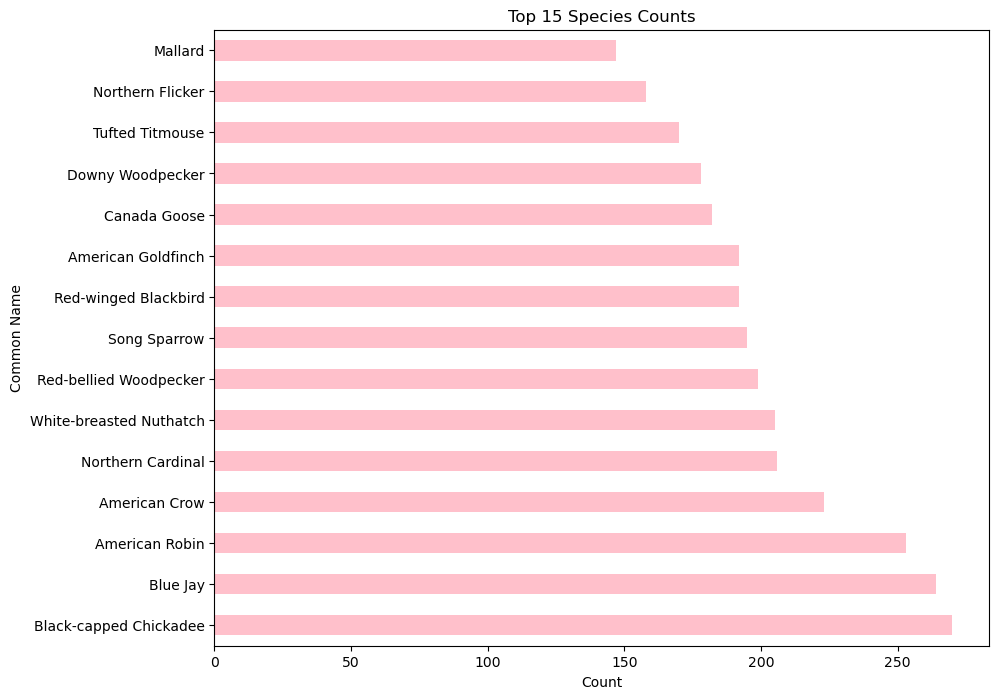

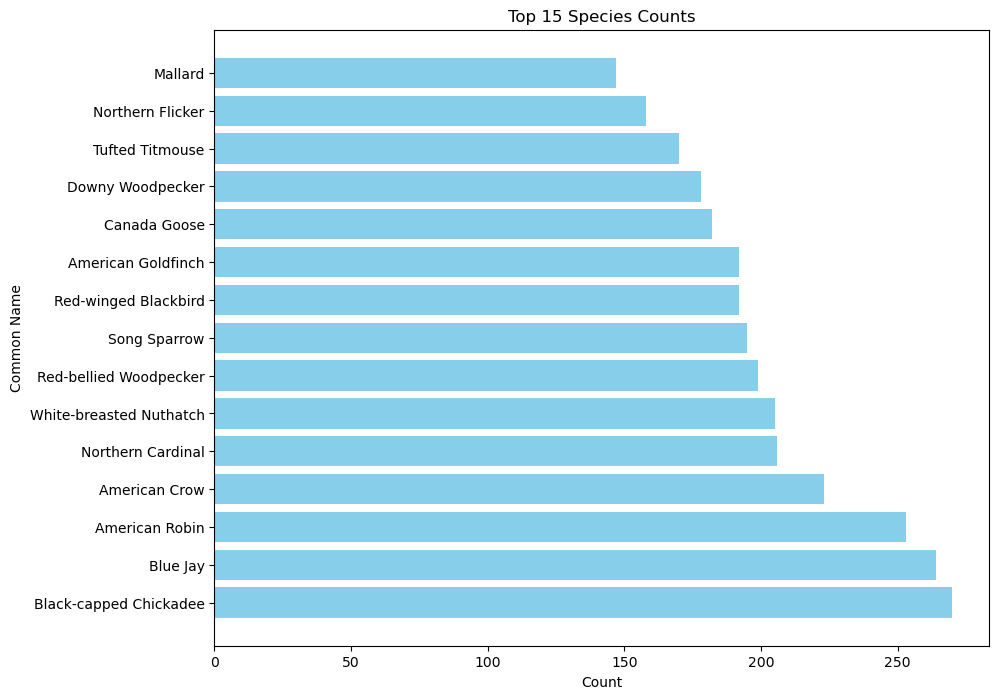

C:\Users\saram\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saram\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saram\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


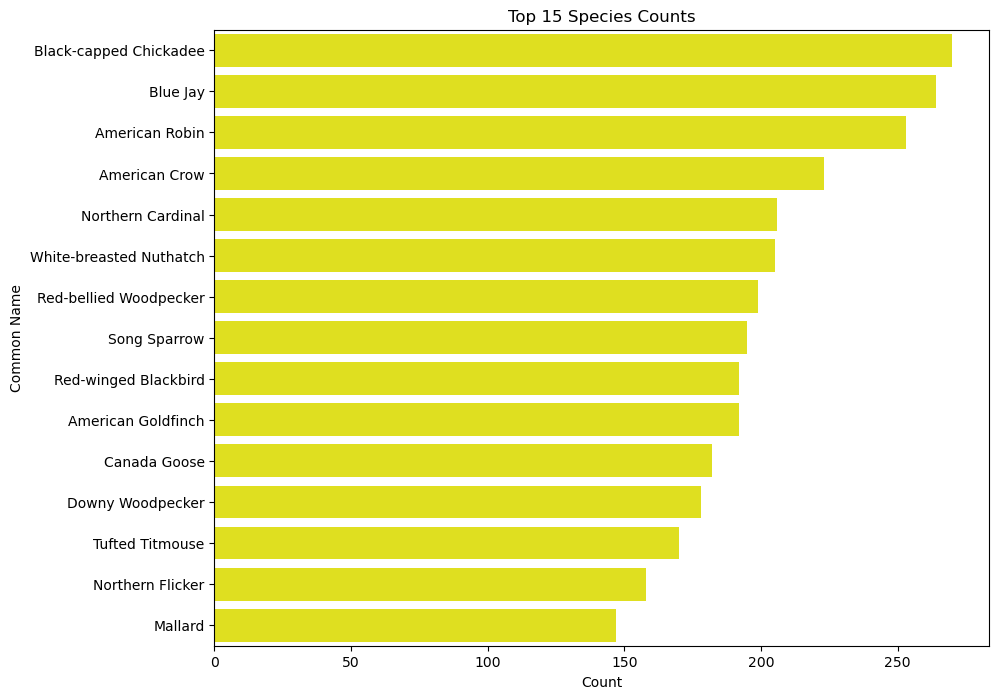

In [106]:
# Assuming you have already calculated the species counts
top_15_records = species_counts.head(15)

# Plot with pandas
top_15_records.plot(kind='barh', figsize=(10, 8), color='pink')
# The kind='barh' specifies that we want a horizontal bar chart, otherwise we would have used just bar
plt.title('Top 15 Species Counts')
plt.xlabel('Count')
plt.ylabel('Common Name')
plt.show()

# Plot with matplotlib
plt.figure(figsize=(10, 8))
plt.barh(top_15_records.index, top_15_records.values, color='skyblue')
plt.title('Top 15 Species Counts')
plt.xlabel('Count')
plt.ylabel('Common Name')
plt.show()

# Plot with Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=top_15_records.values, y=top_15_records.index, color='yellow')
plt.title('Top 15 Species Counts')
plt.xlabel('Count')
plt.ylabel('Common Name')
plt.show()


Repeat the first query (the counts without the sort), but also include the sum of the `Count` field. 

In [118]:
# Counts and sum by common name
counts_and_sum = ebird_cleaned_df.groupby('Common Name').agg({'Count': ['count', 'sum']})
# The agg function is used to aggregate both the count of records and the sum 

print(counts_and_sum)


                         Count     
                         count  sum
Common Name                        
Alder Flycatcher             3    3
American Bittern             2    2
American Black Duck          7   22
American Coot               10  189
American Crow              223  747
...                        ...  ...
Yellow-bellied Sapsucker     8   13
Yellow-billed Cuckoo         1    1
Yellow-breasted Chat         1    2
Yellow-rumped Warbler       39  165
Yellow-throated Vireo        7    8

[211 rows x 2 columns]


#### Number of list entries and birds by location

There are tons of great places to go birding in our area. Use `groupby` and `agg` to get both a count and a sum of the `Count` field. Yes, much like you did in a previous step with `Common Name`. Store the result in a dataframe called `loc_summary_df`. Here's the skeleton code:

In [119]:
loc_summary_df = ebird_cleaned_df.groupby('Location').agg({'Count': ['count', 'sum']})

print(loc_summary_df)

                                                   Count      
                                                   count   sum
Location                                                      
1200–1366 Michigan, Port Huron US-MI (42.9884,-...     5    94
14000 28 Mile Rd, Washington US-MI (42.7434,-82...     3     6
2152 Willow Cir, Shelby Township US-MI (42.6978...     1     1
36463–36999 28 Mile Rd, Lenox US-MI (42.7501,-8...     3  1004
4300–4498 Lorraine Dr, Shelby Township US-MI (4...     9   205
...                                                  ...   ...
Wetzel SP                                             37   151
Wilcox Warnes Nature Sanctuary                        18    27
Wolcott Mill Metropark--north trails                  38    73
Wurtsmith Air Museum                                   2     2
beach                                                 35    58

[95 rows x 2 columns]


In [120]:
loc_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 1200–1366 Michigan, Port Huron US-MI (42.9884,-82.4262) to beach
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   (Count, count)  95 non-null     int64
 1   (Count, sum)    95 non-null     int64
dtypes: int64(2)
memory usage: 2.2+ KB


After you get the above command working, take a look at `loc_summary_df.info()`. It will look like this:

    <class 'pandas.core.frame.DataFrame'>
    Index: 95 entries, 1200–1366 Michigan, Port Huron US-MI (42.9884,-82.4262) to beach
    Data columns (total 2 columns):
     #   Column          Non-Null Count  Dtype
    ---  ------          --------------  -----
     0   (Count, count)  95 non-null     int64
     1   (Count, sum)    95 non-null     int64
    dtypes: int64(2)
    memory usage: 2.2+ KB


We applied multiple aggregate functions to a single column which results in pandas creating what is known as a `MultiIndex` on the column names. These can be tricky to deal with. We can "flatten" things back out to a single level column index by renaming the columns. These approach is shown here:

https://jamesrledoux.com/code/group-by-aggregate-pandas

In [121]:
# rename columns
loc_summary_df.columns = ['loc_count', 'loc_sum']

# reset index to get grouped columns back
loc_summary_df = loc_summary_df.reset_index()

print(loc_summary_df)


                                             Location  loc_count  loc_sum
0   1200–1366 Michigan, Port Huron US-MI (42.9884,...          5       94
1   14000 28 Mile Rd, Washington US-MI (42.7434,-8...          3        6
2   2152 Willow Cir, Shelby Township US-MI (42.697...          1        1
3   36463–36999 28 Mile Rd, Lenox US-MI (42.7501,-...          3     1004
4   4300–4498 Lorraine Dr, Shelby Township US-MI (...          9      205
..                                                ...        ...      ...
90                                          Wetzel SP         37      151
91                     Wilcox Warnes Nature Sanctuary         18       27
92               Wolcott Mill Metropark--north trails         38       73
93                               Wurtsmith Air Museum          2        2
94                                              beach         35       58

[95 rows x 3 columns]


In [122]:
loc_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   95 non-null     object
 1   loc_count  95 non-null     int64 
 2   loc_sum    95 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [123]:
loc_summary_df.sort_values(['loc_count'], ascending=False)

,Location,loc_count,loc_sum
26,Cranberry Lake Park,1066,3736
18,Bear Creek Nature Park,1052,4742
29,Draper Twin Lake Park,879,2753
23,Charles Ilsley Park,785,3472
80,Tawas Point SP,506,1684
...,...,...,...
19,Black River County Park,2,102
93,Wurtsmith Air Museum,2,2
15,Au Sable,1,1
9,"57083–57409 Mount Vernon Rd, Washington US-MI ...",1,1


#### Joining to a taxonomy table

Now let's get the ebird Taxonomy so we can do group by analysis using things higher levels of taxonomy aggregation such as Family.

I've actually already downloaded and saved the taxonomy file using the eBird API described in the link above. However, I want to show you the code just so you can see how simple it is. The code will NOT work because I've removed my eBird API key. I cover web APIs and other methods of web scraping in our [Automated web data gathering module in my Adv Analytics w/ Python course](www.sba.oakland.edu/faculty/isken/courses/mis6900_s23/getting_data_from_web.html). More info available at https://documenter.getpostman.com/view/664302/S1ENwy59?version=latest#intro.

In [ ]:
# Just demo'ing how to grab the ebird taxonomy table using
# DO NOT RUN THIS - IT WON'T WORK
import requests

# I got the URL from the eBird API documentation link above
url = "https://api.ebird.org/v2/ref/taxonomy/ebird?"

payload = {}
headers = {
  'X-eBirdApiToken': '{{NEED TO PUT YOUR EBIRD API KEY HERE}}'
}

# The response object holds all the data bytes downloaded
response = requests.request("GET", url, headers=headers, data = payload)

# Use the io library's StringIO function which lets us mimic reading a file from a string variable.
# response.text, as you might have guessed is a giant string containing all the data downloaded.
taxonomy_df = pd.read_csv(io.StringIO(response.text))

In [125]:
taxonomy_df = pd.read_csv('data/taxonomy_df.csv')
taxonomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16513 entries, 0 to 16512
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SCIENTIFIC_NAME  16513 non-null  object 
 1   COMMON_NAME      16513 non-null  object 
 2   SPECIES_CODE     16513 non-null  object 
 3   CATEGORY         16513 non-null  object 
 4   TAXON_ORDER      16513 non-null  float64
 5   COM_NAME_CODES   14359 non-null  object 
 6   SCI_NAME_CODES   15778 non-null  object 
 7   BANDING_CODES    2250 non-null   object 
 8   ORDER            16511 non-null  object 
 9   FAMILY_COM_NAME  16504 non-null  object 
 10  FAMILY_SCI_NAME  16504 non-null  object 
 11  REPORT_AS        3906 non-null   object 
 12  EXTINCT          178 non-null    object 
 13  EXTINCT_YEAR     178 non-null    float64
dtypes: float64(2), object(12)
memory usage: 1.8+ MB


In [126]:
taxonomy_df.head()

,SCIENTIFIC_NAME,COMMON_NAME,SPECIES_CODE,CATEGORY,TAXON_ORDER,COM_NAME_CODES,SCI_NAME_CODES,BANDING_CODES,ORDER,FAMILY_COM_NAME,FAMILY_SCI_NAME,REPORT_AS,EXTINCT,EXTINCT_YEAR
0,Struthio camelus,Common Ostrich,ostric2,species,1.0,COOS,STCA,NaN,Struthioniformes,Ostriches,Struthionidae,NaN,NaN,NaN
1,Struthio molybdophanes,Somali Ostrich,ostric3,species,6.0,SOOS,STMO,NaN,Struthioniformes,Ostriches,Struthionidae,NaN,NaN,NaN
2,Struthio camelus/molybdophanes,Common/Somali Ostrich,y00934,slash,7.0,SOOS COOS,STCA STMO,NaN,Struthioniformes,Ostriches,Struthionidae,NaN,NaN,NaN
3,Rhea americana,Greater Rhea,grerhe1,species,8.0,GRRH,RHAM,NaN,Rheiformes,Rheas,Rheidae,NaN,NaN,NaN
4,Rhea pennata,Lesser Rhea,lesrhe2,species,14.0,LERH,RHPE,NaN,Rheiformes,Rheas,Rheidae,NaN,NaN,NaN


A few important things to note:

* the `TAXON_ORDER` field in `taxonomy_df` corresponds to the `Taxonomic Order` field in `ebird_cleaned_df`. This is important since it provides the best way of joining these two dataframes.
* the `FAMILY_COM_NAME` field is the field with which we'd like to do some groupby analysis

Ok, let's do an inner join of `ebird_cleaned_df` and `taxonomy_df`, and create a new dataframe called `ebird_tax_df`. In pandas, it's the [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) function that makes this kind of thing easy to do.

In [127]:
# Join of ebird_cleaned_df and taxonomy_df
ebird_tax_df = pd.merge(ebird_cleaned_df, taxonomy_df, how='inner', 
                        left_on='Taxonomic Order', 
                        right_on='TAXON_ORDER')

ebird_tax_df.head()


,Submission ID,Common Name,Scientific Name,Taxonomic Order,Count,State/Province,County,Location ID,Location,Latitude,...,TAXON_ORDER,COM_NAME_CODES,SCI_NAME_CODES,BANDING_CODES,ORDER,FAMILY_COM_NAME,FAMILY_SCI_NAME,REPORT_AS,EXTINCT,EXTINCT_YEAR
0,S26370234,Snow Goose,Anser caerulescens,256,1,US-MI,Oakland,L967594,Stony Creek Metropark (Oakland Co.),42.726713,...,256.0,GWFG,ANAL,NaN,Anseriformes,"Ducks, Geese, and Waterfowl",Anatidae,gwfgoo,NaN,NaN
1,S53346228,Greater White-fronted Goose,Anser albifrons,271,1,US-MI,Macomb,L1582233,Stony Creek Metropark--south (Macomb Co.),42.722411,...,271.0,TUBG TBGO TABG,ANSE ANFA,NaN,Anseriformes,"Ducks, Geese, and Waterfowl",Anatidae,NaN,NaN,NaN
2,S50995473,Canada Goose,Branta canadensis,324,100,US-MI,Alcona,L8309640,Black River County Park,44.816691,...,324.0,NaN,NaN,UNGO,Anseriformes,"Ducks, Geese, and Waterfowl",Anatidae,NaN,NaN,NaN
3,S43727153,Canada Goose,Branta canadensis,324,2,US-MI,Alcona,L3258501,Harrisville Harbor,44.658916,...,324.0,NaN,NaN,UNGO,Anseriformes,"Ducks, Geese, and Waterfowl",Anatidae,NaN,NaN,NaN
4,S83771809,Canada Goose,Branta canadensis,324,12,US-MI,Alcona,L3258501,Harrisville Harbor,44.658916,...,324.0,NaN,NaN,UNGO,Anseriformes,"Ducks, Geese, and Waterfowl",Anatidae,NaN,NaN,NaN


#### Number of species and birds by FAMILY_COM_NAME

In [128]:
ebird_tax_df.groupby('FAMILY_COM_NAME').agg({'Count':['count', 'sum']})

Count      
                                      count   sum
FAMILY_COM_NAME                                  
Auks, Murres, and Puffins                 9   342
Barn-Owls                                32    35
Bulbuls                                  60   337
Buttonquail                               2     2
Cardinals and Allies                    253  2196
Cockatoos                                27    33
Crows, Jays, and Magpies                  1     2
Cuckoos                                   4     5
Ducks, Geese, and Waterfowl             472  8527
Finches, Euphonias, and Allies            3    24
Gulls, Terns, and Skimmers              131  1209
Hawks, Eagles, and Kites                122   362
Herons, Egrets, and Bitterns             18    83
Ibises and Spoonbills                     2    13
Jacanas                                  76   125
Larks                                   440  1622
Leaf Warblers                             2    32
Megapodes                                32   897
New World Sparrows                        1     2
New World Warblers                      120   313
Northern Storm-Petrels                    2     3
Old World Flycatchers                   142   470
Old World Parrots                       108   207
Owls                                      6     6
Pheasants, Grouse, and Allies             2     2
Pigeons and Doves                        26   101
Pratincoles and Coursers                 13    39
Rails, Gallinules, and Coots             12   192
Sandpipers and Allies                     5    15
Shearwaters and Petrels                  17    81
Skuas and Jaegers                         6    13
Starlings                                89   135
Tanagers and Allies                     746  2046
Thrushes and Allies                      19    24
Tits, Chickadees, and Titmice             3     7
Troupials and Allies                    101   304
Tyrant Flycatchers                      170   233
Woodpeckers                             182   306
Woodswallows, Bellmagpies, and Allies   110   170
Wrens                                    61    80

### Overall life list

Let's create a life list which contains the `Common Name` and the first `Date` for which this species was submitted on a list. Here's what the results should look like:

    Common Name
    Alder Flycatcher           2016-05-25
    American Bittern           2017-04-14
    American Black Duck        2014-12-14
    American Coot              2015-04-21
    American Crow              2015-01-14
                                  ...    
    Yellow-bellied Sapsucker   2016-05-20
    Yellow-billed Cuckoo       2021-06-09
    Yellow-breasted Chat       2018-05-14
    Yellow-rumped Warbler      2015-05-06
    Yellow-throated Vireo      2016-05-20
    Name: Date, Length: 211, dtype: datetime64[ns]


In [130]:
# Overall lifer list
species_grp_0 = ebird_cleaned_df.groupby(['Common Name'])
lifer_list_df = species_grp_0['Date'].min().reset_index()

print(lifer_list_df)


                  Common Name       Date
0            Alder Flycatcher 2016-05-25
1            American Bittern 2017-04-14
2         American Black Duck 2014-12-14
3               American Coot 2015-04-21
4               American Crow 2015-01-14
..                        ...        ...
206  Yellow-bellied Sapsucker 2016-05-20
207      Yellow-billed Cuckoo 2021-06-09
208      Yellow-breasted Chat 2018-05-14
209     Yellow-rumped Warbler 2015-05-06
210     Yellow-throated Vireo 2016-05-20

[211 rows x 2 columns]


**HACKER EXTRA** Find those birds that were only seen exactly one time.

In [133]:
# Birds seen exactly one time
birds_seen_once = ebird_cleaned_df.groupby('Common Name')['Count'].sum().eq(1).reset_index() 
# This line first calculates the sum of counts for each species and then checks if the count is equal to 1 using .eq(1)

birds_seen_once = birds_seen_once[birds_seen_once['Count']].merge(lifer_list_df, on='Common Name')
# This line merges with the lifer_list_df to get the Common Name and the first Date for each species that was seen exactly one time.

print(birds_seen_once)

                    Common Name  Count       Date
0             Baird's Sandpiper   True 2021-08-23
1          Black-bellied Plover   True 2018-05-17
2                      Bobolink   True 2021-05-14
3        Eastern Whip-poor-will   True 2016-05-14
4           Gray-cheeked Thrush   True 2018-05-14
5   Greater White-fronted Goose   True 2019-02-05
6                Harlequin Duck   True 2018-05-20
7                 Least Bittern   True 2017-04-14
8        Olive-sided Flycatcher   True 2016-09-07
9                 Piping Plover   True 2023-06-23
10            Rough-legged Hawk   True 2015-01-14
11                 Snow Bunting   True 2017-12-16
12                   Snow Goose   True 2015-12-19
13                    Snowy Owl   True 2014-12-14
14                 Snowy Plover   True 2018-04-03
15             Southern Lapwing   True 2022-07-01
16          White-winged Scoter   True 2014-12-14
17         Yellow-billed Cuckoo   True 2021-06-09


### Number of lifers by year


We'd like to know how many lifers we've seen each year. Read in the lifer list from the provided csv file.

In [134]:
lifer_list_df = pd.read_csv('data/lifer_list_df.csv', parse_dates=['Date'])

In [135]:
lifer_list_df

,Common Name,Date
0,Alder Flycatcher,2016-05-25
1,American Bittern,2017-04-14
2,American Black Duck,2014-12-14
3,American Coot,2015-04-21
4,American Crow,2015-01-14
...,...,...
206,Yellow-bellied Sapsucker,2016-05-20
207,Yellow-billed Cuckoo,2021-06-09
208,Yellow-breasted Chat,2018-05-14
209,Yellow-rumped Warbler,2015-05-06


So, we somehow need to aggregate our lifers by year. Some newish ways to do date related group by work can be found in the following post. It's quite helpful for this question.

https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column/47140458#47140458

Here's the results I got. Yep, gets hard to get more lifers unless you do some traveling. 2014 is low because the first list was entered in December.


        Common Name
        count
    Date 	
    2014 	23
    2015 	111
    2016 	40
    2017 	12
    2018 	11
    2019 	1
    2020 	1
    2021 	6
    2022 	2
    2023 	4
    
Here's a little help. Finish the command to produce this output.

In [140]:
lifer_count_by_year = lifer_list_df.groupby(lifer_list_df['Date'].dt.year).agg({'Common Name': 'count'})

lifer_count_by_year

,Common Name
Date,
2014,23
2015,111
2016,40
2017,12
2018,11
2019,1
2020,1
2021,6
2022,2


### Time series of lifers
Let's look at `lifer_list_df` sorted by date.

In [141]:
lifer_list_df.sort_values(['Date'])

,Common Name,Date
105,House Sparrow,2014-12-14
195,White-breasted Nuthatch,2014-12-14
66,Downy Woodpecker,2014-12-14
76,European Starling,2014-12-14
45,Canvasback,2014-12-14
...,...,...
182,Southern Lapwing,2022-07-01
166,Ruffed Grouse,2023-04-14
120,Merlin,2023-05-10
144,Piping Plover,2023-06-23


What we'd like to get is a series or dataframe containing the date on which one or more lifers was seen as well as the number of days since the last lifer was seen. This turns out to be somewhat involved and I've already done it for us. Let's read in the dataframe and look at it.

In [142]:
lifers_days_since_df = pd.read_csv('data/lifers_days_since_df.csv', parse_dates=['Date'])
lifers_days_since_df

,Date,days_since
0,2014-12-14,0
1,2015-01-05,22
2,2015-01-14,9
3,2015-01-21,7
4,2015-01-28,7
...,...,...
67,2022-07-01,121
68,2023-04-14,287
69,2023-05-10,26
70,2023-06-23,44


Now your job is to create a times series plot of this data. You can use pandas, matplotlib, or Seaborn.

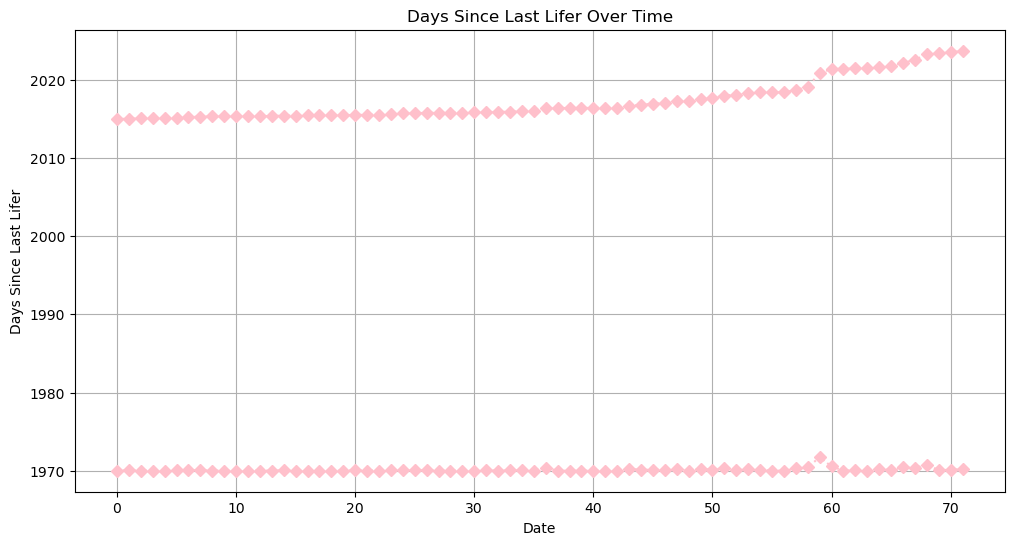

In [151]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(lifers_days_since_df, marker='D', linestyle=':', color='pink')
plt.title('Days Since Last Lifer Over Time')
plt.xlabel('Date')
plt.ylabel('Days Since Last Lifer')
plt.grid(True)
plt.show()

**HACKER EXTRA** As I mentioned above, getting from `lifer_list_df` to `lifers_days_since_df` is a little involved and involves multiple steps. It's important to note that the data type of `days_since` is integer. So, if you want to try a challenging extra credit problem, give this a shot.

**HACKER EXTRA SOLUTION**

In [153]:
# Sort lifer list by date
lifer_list_df = lifer_list_df.sort_values(by='Date')

# Calculate the number of days since the last lifer
lifer_list_df['Days Since Last Lifer'] = lifer_list_df['Date'].diff().dt.days # the diff() function calculates the difference 

lifers_days_since_df = lifer_list_df[['Date', 'Days Since Last Lifer']].copy()

print(lifers_days_since_df)


          Date  Days Since Last Lifer
105 2014-12-14                    NaN
198 2014-12-14                    0.0
10  2014-12-14                    0.0
157 2014-12-14                    0.0
2   2014-12-14                    0.0
..         ...                    ...
182 2022-07-01                  121.0
166 2023-04-14                  287.0
120 2023-05-10                   26.0
144 2023-06-23                   44.0
146 2023-09-10                   79.0

[211 rows x 2 columns]
